# Libraries used
PV --> Running 3.10.10
Running Kernel3.9.13 base anaconda

#perform al pip installs in one go comment out if already installed
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install scipy
!pip install statsmodels
!pip install plotly
!pip install cufflinks
!pip install squarify
!pip install yellowbrick
!pip install lazypredict
!pip install pandas_profiling

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.io as pio
#import squarify #treemap
import os
import matplotlib
import warnings


#to enable the inline plotting
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [6]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler


from scipy.stats import normaltest

from pandas_profiling import ProfileReport

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette

import lazypredict
from lazypredict.Supervised import LazyClassifier

warnings.simplefilter(action='ignore', category=FutureWarning)

# Functions


In [7]:
# Function for EDA. Using the display() function to have  well-formatted tables. We are mainly using pandas to explore the datasets

def dataset_description(df_target):

    print('This is the Dataset shape: %s\n' % (df_target.shape, ))
    print('Dataset columns: %s\n' % df_target.columns)

    print('\nColumns description:\n')
    display(df_target.info())
    display(df_target.describe())  # describe the dataset

    print('\nNull values:\n')
    display(df_target.isnull().sum())  # Identify null values

#function performing a quick check on df_inspection to have best of pandas functions separated by a line
def quick_check(dataframe):
    print('First 5 rows %s\n')
    print(dataframe.head(2))
    print("=====================================")
    print('Dataframe shape %s\n')
    print(dataframe.shape)
    print("=====================================")
    print('Dataframe describe categorical %s\n')
    print(dataframe.describe(include=['O']))
    print("=====================================")
    print('Dataframe null values %s\n')
    print(dataframe.isnull().sum())
    print("=====================================")
    print('Dataframe value counts %s\n')
    print(dataframe.value_counts())
    print("=====================================")

#stats function
def stats(dataframe):
    print('Dataframe correlation %s\n')
    print(dataframe.corr())
    print("=====================================")
    print('Dataframe covariance %s\n')
    print(dataframe.cov())
    print("=====================================")
    print('Dataframe skew %s\n')
    print(dataframe.skew())
    print("=====================================")
    print('Dataframe kurtosis %s\n')
    print(dataframe.kurt())
    print("=====================================")

#create a function to normalize characters from a dataset's column in Spanish
def normalize_characters(df, column):
    df[column] = df[column].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace('á', 'a')
    df[column] = df[column].str.replace('é', 'e')
    df[column] = df[column].str.replace('í', 'i')
    df[column] = df[column].str.replace('ó', 'o')
    df[column] = df[column].str.replace('ú', 'u')
    df[column] = df[column].str.replace('ñ', 'n')
    df[column] = df[column].str.replace('ü', 'u')
    df[column] = df[column].str.replace('ç', 'c')
    df[column] = df[column].str.replace('(', '')
    df[column] = df[column].str.replace(')', '')
    df[column] = df[column].str.replace('\'', '')
    df[column] = df[column].str.replace('´', '')
    df[column] = df[column].str.replace('`', '')
    df[column] = df[column].str.replace('’', '')
    return df

#create function to change detypes in64 to int32 in a df
def change_dtypes(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
    return df

In [8]:
#show all print outputs when using a function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#display all columns
pd.set_option('display.max_columns', None)


# 2. Data Collection and Understanding 

## Network file

The network.csv file contains a static picture of the gas pipeline network. Every row corresponds to a pipe and has a unique PipeId identifier. The table has 1.446.529 pipes. 

The columns describe relevant features of each pipe. The complete list is: 

PipeId - unique identifier for the pipe 

Province - Spanish province where the pipe is located 

Town - Town or city where the pipe is located 

YearBuilt - Year in which the pipe was built and installed 

Material - Material in which the pipe is built 

GasType - Type of gas that runs through the pipe 

Diameter - diameter of the pipe 

Length - Length of the pipe 

Pressure - Pressure of the gas that runs through the pipe (bar) 

NumConnections - Number of connections (external). 

NumConnectionsUnder - Number of connections (internal and buried) 

BoolBridle  - Whether the pipe is bridled (True) or welded (False) 

## Inspection file

MaintenanceId - unique identifier for the inspection operation 

InspectionYear - year in which the inspection took place 

InspectionDate - date in which the inspection took place 

MonthsLastRev - number of months elapsed since the last previous inspection. 

Severity - Severity of the damage found (1: most severe, 3: least severe) 

Incidence - Boolean whether an incident was found on the revision (1) or not (0). 

# Merging datasets

In [9]:
#point to the folder where the data is stored for Pedro
os.chdir(r"C:\Users\pedro\datathon")

# Loading inspection data
df_inspection = pd.read_csv('inspections.csv')

# Loading network data
df_network = pd.read_csv('network.csv')

In [7]:
#point to the folder where the data is stored For Juan
os.chdir(r"C:\Users\JuanHorrillo\OneDrive - IE Students\Documents\Masters\Sustainability\Notebook")

# Loading inspection data
df_inspection = pd.read_csv('inspections.csv')

# Loading network data
df_network = pd.read_csv('network.csv')

In [10]:
quick_check(df_inspection)


First 5 rows %s

      PipeId MaintenanceId  InspectionYear InspectionDate  MonthsLastRev  \
0  189311802  ZRV-00001972            2010     2010-10-01             24   
1  188889914  ZRV-00001406            2010     2010-10-01             22   

   Severity  Incidence  
0         4          0  
1         4          0  
Dataframe shape %s

(6345344, 7)
Dataframe describe categorical %s

       MaintenanceId InspectionDate
count        6345344        6345344
unique          4179           3565
top     ZRV-00002121     2014-05-05
freq           21773           5832
Dataframe null values %s

PipeId            0
MaintenanceId     0
InspectionYear    0
InspectionDate    0
MonthsLastRev     0
Severity          0
Incidence         0
dtype: int64
Dataframe value counts %s

PipeId     MaintenanceId  InspectionYear  InspectionDate  MonthsLastRev  Severity  Incidence
489616     ZRV-00003385   2013            2013-05-08      16             4         0            1
256852211  ZRV-00002129   2016    

The function shows we have 6345344 rows for the inspections, among each 4179 appear to be unique and the most repeated one is ZRV-00002121 on 2014-05-05


In [11]:
#searching for MaintenanceId ZRV-00002121 in df_inspection
df_inspection[df_inspection['MaintenanceId'] == 'ZRV-00002121']

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence
622563,188821075,ZRV-00002121,2012,2011-12-28,24,4,0
622571,191340447,ZRV-00002121,2012,2011-12-28,24,4,0
622572,191340427,ZRV-00002121,2012,2011-12-28,24,4,0
622574,191340421,ZRV-00002121,2012,2011-12-28,24,4,0
622575,188802580,ZRV-00002121,2012,2011-12-28,24,4,0
...,...,...,...,...,...,...,...
5737006,450197378,ZRV-00002121,2020,2020-01-29,24,4,0
5737013,358229516,ZRV-00002121,2020,2020-01-29,24,4,0
5737179,351671916,ZRV-00002121,2020,2020-01-29,24,4,0
5737289,351671518,ZRV-00002121,2020,2020-01-29,24,4,0


<AxesSubplot: xlabel='InspectionYear'>

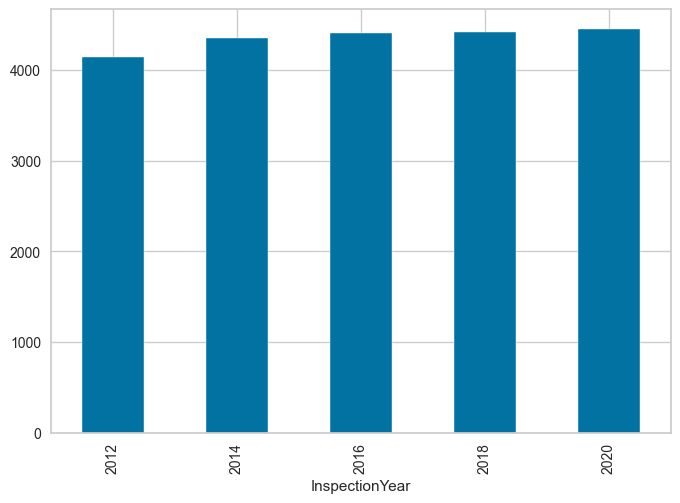

In [13]:
#plotting the distribution of MaintenanceId accross the years for ZRV-00002121 in df_inspection
df_inspection[df_inspection['MaintenanceId'] == 'ZRV-00002121'].groupby('InspectionYear')['MaintenanceId'].count().plot(kind='bar')

In [9]:
quick_check(df_network)

First 5 rows %s

   PipeId     Province                   Town  YearBuilt Material  \
0  489616  Ciudad Real  Torralba de Calatrava       2012       PE   
1  489645  Ciudad Real  Torralba de Calatrava       2012       PE   

       GasType  Diameter  Length  Pressure  NumConnections  \
0  Gas natural      63.0   7.792       0.4               0   
1  Gas natural      90.0   2.080       0.4               0   

   NumConnectionsUnder  BoolBridle  
0                    0       False  
1                    0       False  
Dataframe shape %s

(1446539, 12)
Dataframe describe categorical %s

         Province     Town Material      GasType
count     1446539  1446539  1446539      1446539
unique         38     1972       11            2
top     Barcelona   Madrid       PE  Gas natural
freq       389307    76666  1242845      1388397
Dataframe null values %s

PipeId                 0
Province               0
Town                   0
YearBuilt              0
Material               0
GasType     

In [10]:
stats(df_inspection)

Dataframe correlation %s

                  PipeId  InspectionYear  MonthsLastRev  Severity  Incidence
PipeId          1.000000       -0.123868       0.048799  0.017614  -0.021449
InspectionYear -0.123868        1.000000       0.117585  0.001188  -0.000359
MonthsLastRev   0.048799        0.117585       1.000000  0.011268  -0.013749
Severity        0.017614        0.001188       0.011268  1.000000  -0.904174
Incidence      -0.021449       -0.000359      -0.013749 -0.904174   1.000000
Dataframe covariance %s

                      PipeId  InspectionYear  MonthsLastRev       Severity  \
PipeId          1.294358e+16   -4.099991e+07   2.754554e+07  129283.543032   
InspectionYear -4.099991e+07    8.464272e+00   1.697315e+00       0.000223   
MonthsLastRev   2.754554e+07    1.697315e+00   2.461659e+01       0.003607   
Severity        1.292835e+05    2.230601e-04   3.606757e-03       0.004162   
Incidence      -1.074542e+05   -4.603098e-05  -3.003968e-03      -0.002569   

                  

In [11]:
stats(df_network)

Dataframe correlation %s

                       PipeId  YearBuilt  Diameter    Length  Pressure  \
PipeId               1.000000  -0.052882  0.133925 -0.013087  0.044928   
YearBuilt           -0.052882   1.000000 -0.155437  0.028727  0.047748   
Diameter             0.133925  -0.155437  1.000000  0.073956  0.194073   
Length              -0.013087   0.028727  0.073956  1.000000  0.105697   
Pressure             0.044928   0.047748  0.194073  0.105697  1.000000   
NumConnections      -0.045010  -0.028777 -0.112723  0.307837 -0.102855   
NumConnectionsUnder -0.010956   0.011157 -0.007065  0.017895 -0.002610   
BoolBridle          -0.091219  -0.176955  0.089100 -0.022166 -0.065808   

                     NumConnections  NumConnectionsUnder  BoolBridle  
PipeId                    -0.045010            -0.010956   -0.091219  
YearBuilt                 -0.028777             0.011157   -0.176955  
Diameter                  -0.112723            -0.007065    0.089100  
Length                 

In [13]:
#join Inspection and network datasets on PipeId to create our TRAIN dataset
train = pd.merge(df_inspection, df_network, on='PipeId', how='right')

In [14]:
train.shape

(6364029, 18)

In [30]:
df_inspection.shape

(6345344, 7)

JF: There are 18K null values that do not have information in the df_network so our TRAIN data set is now bigger and we will need to deal with the nulls further down.

In [15]:
#count null values in train dataset
train.isnull().sum()


PipeId                     0
MaintenanceId          18685
InspectionYear         18685
InspectionDate         18685
MonthsLastRev          18685
Severity               18685
Incidence              18685
Province                   0
Town                       0
YearBuilt                  0
Material                   0
GasType                    0
Diameter                   0
Length                     0
Pressure                   0
NumConnections             0
NumConnectionsUnder        0
BoolBridle                 0
dtype: int64

In [ ]:
#point to the folder where the data is stored for Pedro
os.chdir(r"C:\Users\pedro\datathon\Datathon-Rules-and-Documentation")

# Loading inspection data
test = pd.read_csv('sample_submission.csv')

In [21]:
#point to the folder where the data is stored for Juan
os.chdir(r"C:\Users\JuanHorrillo\OneDrive - IE Students\Documents\Masters\Sustainability\Notebook")

# Loading inspection data
df_sample = pd.read_csv('sample_submission.csv')

In [22]:
df_sample.shape

(909733, 2)

Creating the TEST df which will be used to test our model.  Thisis made of the sample submission with the columns from the network

In [33]:
#join both datasets on PipeId
test = pd.merge(df_network , df_sample, on='PipeId', how='right')

In [34]:
test.shape

(909733, 13)

In [45]:
test.head()

,PipeId,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,Incidence
0,446859944,Valencia,Alginet,2012,PE,Gas natural,110.0,44.286,0.15,0,0,False,0
1,428124500,Valencia,Alginet,2012,PE,Gas natural,160.0,110.715,0.15,2,0,False,0
2,438428871,Valencia,Alginet,2012,PE,Gas natural,110.0,13.575,0.15,0,0,False,0
3,429034569,Valencia,Alginet,2012,PE,Gas natural,110.0,327.689,0.15,3,0,False,0
4,411184477,Valencia,Alginet,2007,PE,Gas natural,200.0,932.762,0.15,0,0,False,0


In [46]:
df_sample.head()

,PipeId,Incidence
0,446859944,0
1,428124500,0
2,438428871,0
3,429034569,0
4,411184477,0


In [43]:
#create a dataframe with the unique PipeId from df_sample and a dataframe with the PipeId from df_network 
sample_unique = df_sample['PipeId'].unique()
network_unique = df_network['PipeId'].unique()
#check if all the values in sample_unique are in network_unique
np.all(np.isin(sample_unique, network_unique))


True

In [48]:
#Check for null values in test dataset
test_null = test.isnull().sum()    
test_null.head()

PipeId       0
Province     0
Town         0
YearBuilt    0
Material     0
dtype: int64

JF: No null Values in TEST data set

In [51]:
#creating a subset for altering the dataset after initial EDA
train_copy = train.copy()

In [53]:
#find the columns with null values in train_copy
train_copy.isnull().sum()

PipeId                     0
MaintenanceId          18685
InspectionYear         18685
InspectionDate         18685
MonthsLastRev          18685
Severity               18685
Incidence              18685
Province                   0
Town                       0
YearBuilt                  0
Material                   0
GasType                    0
Diameter                   0
Length                     0
Pressure                   0
NumConnections             0
NumConnectionsUnder        0
BoolBridle                 0
dtype: int64

In [52]:
#show me a head of train_copy with YearBuilt == 2020
#ESTO DE AQUI HAY QUE CARGARSELO!!! JF: no todos mira que hay unos que son nuevos
train_copy[train_copy['YearBuilt'] > 2020].head()

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle
64887,185802404,NaN,NaN,NaN,NaN,NaN,NaN,Girona,Puigcerda,2021,PN,Gas natural,110.0,12.012,0.150,1,0,True
64889,188243116,NaN,NaN,NaN,NaN,NaN,NaN,Girona,Puigcerda,2021,PN,Gas natural,90.0,11.817,0.150,1,0,True
70787,185839446,NaN,NaN,NaN,NaN,NaN,NaN,Girona,Girona,2021,PN,Gas natural,110.0,5.099,0.025,1,0,True
70788,186392655,NaN,NaN,NaN,NaN,NaN,NaN,Girona,Girona,2021,PN,Gas natural,63.0,4.512,0.025,1,0,True
70790,186441076,NaN,NaN,NaN,NaN,NaN,NaN,Girona,Girona,2021,PN,Gas natural,63.0,0.289,0.025,0,0,True


In [60]:
#remove MaintenanceId and InspectionDate from train_copy
train_copy.drop('MaintenanceId', axis=1, inplace=True)
train_copy.drop('InspectionDate', axis=1, inplace=True)

In [65]:
#count the PipeID that have YearBuilt equal to 2021 and InspectionYear equal to NaN
train_copy[(train_copy['YearBuilt'] == 2021) & (train_copy['InspectionYear'].isnull())].shape


(1960, 16)

JF: There are 1960 new pipes that were built after 2021 in the inspection dataset??? WTF they are lying to us!

In [67]:
#count the PipeId in inspection dataset that YearBuilt is equal to 2021
df_inspection[df_inspection['InspectionYear'] == 2021].shape

(1445, 7)

In [55]:
#show me a head of train_copy with YearBuilt higher than InspectionYear and count them
train_copy[(train_copy['YearBuilt'] > train_copy['InspectionYear'])].shape

(7672, 18)

In [56]:
#show me a head of train_copy where Incicende = 0 and severity >0 and count them
train_copy[(train_copy['Incidence'] == 0) & (train_copy['Severity'] != 4)].shape

(0, 18)

In [57]:
#show me the outlier values of length in train_copy
train_copy['Length'].describe()

count    6.364029e+06
mean     3.656308e+01
std      7.225819e+01
min      0.000000e+00
25%      4.004000e+00
50%      1.426100e+01
75%      4.462400e+01
max      2.610094e+04
Name: Length, dtype: float64

In [ ]:
train_copy.head(1)


In [ ]:
train_copy.columns

# Data Wrangling on combined dataset

As a result of merging both datasets we now have pipeline duplicates per each maintenace_id operation. Before getrtng rid of the duplicates, we want to engineer some metrics interesting to the model such as number of operations, number of incidents and average risk based on severity*incidence

In [ ]:
#show all columns in pandas
pd.set_option('display.max_columns', None)

In [ ]:
#create a new column counting the number of inspections (MaintenanceId) per PipeId
train_copy['Inspections'] = train_copy.groupby('PipeId')['MaintenanceId'].transform('count')
#aggregate the number of Incidents per pipe in a new column and place it in the fourth position
train_copy['No_Incidents'] = train_copy.groupby('PipeId')['Incidence'].transform('sum')
#place the new columns in the third position
cols = list(train_copy.columns.values)
cols.pop(cols.index('No_Incidents'))
train_copy = train_copy[['PipeId', 'MaintenanceId', 'Inspections', 'No_Incidents', 'InspectionYear', 'InspectionDate',
       'MonthsLastRev', 'Severity', 'Incidence', 'Province', 'Town',
       'YearBuilt', 'Material', 'GasType', 'Diameter', 'Length', 'Pressure',
       'NumConnections', 'NumConnectionsUnder', 'BoolBridle']]
#show head of rows only where No_Incidents is greater than 0
train_copy[train_copy['No_Incidents'] > 2].head(10)


In [ ]:
train_copy.columns

In [ ]:
#create a column named average_severity that calculates the average severity per pipe 
train_copy['average_severity'] = train_copy.groupby('PipeId')['Severity'].transform('mean')
#show head of rows only where mean has a decimal value
train_copy[train_copy['average_severity'] % 1 != 0].head(10)
#place the new column in 7th position
cols = list(train_copy.columns.values)
cols.pop(cols.index('average_severity'))
train_copy = train_copy[['PipeId', 'MaintenanceId', 'Inspections', 'No_Incidents', 
    'InspectionYear', 'InspectionDate', 'average_severity', 'MonthsLastRev', 'Severity', 'Incidence', 'Province',
    'Town','YearBuilt', 'Material', 'GasType', 'Diameter', 'Length', 'Pressure', 'NumConnections',
    'NumConnectionsUnder', 'BoolBridle']]


In [ ]:
#create a column taking average severity and number of total incidences per pipe multiplying them and naming it as risk_(s*i)
train_copy['Risk_S*I'] = train_copy['average_severity'] * train_copy['No_Incidents'] 
#position the new column in the 7th position
cols = list(train_copy.columns.values)
cols.pop(cols.index('Risk_S*I'))
train_copy = train_copy[['PipeId', 'MaintenanceId', 'Inspections', 'No_Incidents', 'Risk_S*I',
    'InspectionYear', 'InspectionDate', 'average_severity', 'MonthsLastRev', 'Severity', 'Incidence', 'Province',
    'Town','YearBuilt', 'Material', 'GasType', 'Diameter', 'Length', 'Pressure', 'NumConnections',
    'NumConnectionsUnder', 'BoolBridle']]

In [ ]:
#show head of rows only where Risk_S*I is greater than 0
train_copy[train_copy['Risk_S*I'] > 0].head(10)

In [ ]:
#create a new column taking Risk_S*I and dividing it by No_Inspections naming it as Risk_S*I/Inspections and placing it in 6th position
train_copy['Risk_S*I/Inspections'] = train_copy['Risk_S*I'] / train_copy['Inspections']
cols = list(train_copy.columns.values)
cols.pop(cols.index('Risk_S*I/Inspections'))
train_copy = train_copy[['PipeId', 'MaintenanceId', 'Inspections', 'Risk_S*I/Inspections', 'No_Incidents', 
    'Risk_S*I', 'average_severity', 'MonthsLastRev', 'Severity', 'Incidence', 'Province',
    'Town','YearBuilt', 'InspectionYear', 'InspectionDate','Material', 'GasType', 'Diameter', 'Length', 'Pressure', 'NumConnections',
    'NumConnectionsUnder', 'BoolBridle']]

#show head of rows only where Risk_S*I/Inspections is greater than 0
train_copy[train_copy['Risk_S*I/Inspections'] > 0].head(5)

In [ ]:
#creating a new column named probability with No_Incidents divided by Inspections
train_copy['Probability_incidence'] = train_copy['No_Incidents'] / train_copy['Inspections']
#place column in 3rd position
cols = list(train_copy.columns.values)
cols.pop(cols.index('Probability_incidence'))
train_copy = train_copy[['PipeId', 'MaintenanceId', 'Inspections', 'Probability_incidence', 'Risk_S*I/Inspections', 
    'No_Incidents', 'Risk_S*I', 'average_severity', 'MonthsLastRev', 'Severity', 'Incidence', 'Province',
    'Town','YearBuilt', 'InspectionYear', 'InspectionDate','Material', 'GasType', 'Diameter', 'Length', 'Pressure',
    'NumConnections', 'NumConnectionsUnder', 'BoolBridle']]
#show head of rows only where Probability is greater than 0
train_copy[train_copy['Probability_incidence'] > 0].head(5)

In [ ]:
#creating a column with the Average of MonthsLastRev grouping per PipeId and placing it in 7th position
train_copy['Average_MonthsLastRev'] = train_copy.groupby('PipeId')['MonthsLastRev'].transform('mean')
cols = list(train_copy.columns.values)
cols.pop(cols.index('Average_MonthsLastRev'))
train_copy = train_copy[['PipeId', 'MaintenanceId', 'Inspections', 'Probability_incidence', 'Risk_S*I/Inspections', 'Average_MonthsLastRev',
    'No_Incidents', 'Risk_S*I', 'average_severity', 'MonthsLastRev', 'Severity', 'Incidence', 'Province',
    'Town','YearBuilt', 'InspectionYear', 'InspectionDate','Material', 'GasType', 'Diameter', 'Length', 'Pressure',
    'NumConnections', 'NumConnectionsUnder', 'BoolBridle']]
train_copy.head(1)

In [ ]:
#creating a column named age_pipe_inspection with the difference between InspectionYear and YearBuilt and placing it in 10 th position
train_copy['Age_pipe_inspection'] = train_copy['InspectionYear'] - train_copy['YearBuilt']
cols = list(train_copy.columns.values)
cols.pop(cols.index('Age_pipe_inspection'))
train_copy = train_copy[['PipeId', 'MaintenanceId', 'Inspections', 'Probability_incidence', 'Risk_S*I/Inspections', 'Average_MonthsLastRev', 
    'Age_pipe_inspection', 'No_Incidents', 'Risk_S*I', 'average_severity', 'MonthsLastRev', 'Severity', 'Incidence', 'Province',
    'Town','YearBuilt', 'InspectionYear', 'InspectionDate','Material', 'GasType', 'Diameter', 'Length', 'Pressure',
    'NumConnections', 'NumConnectionsUnder', 'BoolBridle']]
train_copy.head(1)

In [ ]:
#aggregate the number of Age_pipe_inspection in a new column
train_copy['Aggregate_pipe_age_inspection'] = train_copy.groupby('PipeId')['Age_pipe_inspection'].transform('sum')
#place column in 10th position
cols = list(train_copy.columns.values)
cols.pop(cols.index('Aggregate_pipe_age_inspection'))
train_copy = train_copy[['PipeId', 'MaintenanceId', 'Inspections', 'Probability_incidence', 'Risk_S*I/Inspections', 'Average_MonthsLastRev',
    'Age_pipe_inspection', 'Aggregate_pipe_age_inspection', 'No_Incidents', 'Risk_S*I', 'average_severity', 'MonthsLastRev', 'Severity', 'Incidence', 'Province',
    'Town','YearBuilt', 'InspectionYear', 'InspectionDate','Material', 'GasType', 'Diameter', 'Length', 'Pressure',
    'NumConnections', 'NumConnectionsUnder', 'BoolBridle']]
train_copy.head(10)


In [ ]:
#divide the Aggregate_pipe_age_inspection by the count of Incidence when is 1 and create new column with the average_age_pipe_inspection_when_incidence saving it in 10th position
train_copy['average_age_pipe_inspection_when_incidence'] = train_copy['Aggregate_pipe_age_inspection'] / train_copy.groupby('PipeId')['Incidence'].transform('count')
#place column in 10th position
cols = list(train_copy.columns.values)
cols.pop(cols.index('average_age_pipe_inspection_when_incidence'))
train_copy = train_copy[['PipeId', 'MaintenanceId', 'Inspections', 'Probability_incidence', 'Risk_S*I/Inspections', 'Average_MonthsLastRev',
    'Age_pipe_inspection', 'Aggregate_pipe_age_inspection', 'average_age_pipe_inspection_when_incidence', 'No_Incidents', 'Risk_S*I', 'average_severity', 'MonthsLastRev', 'Severity', 'Incidence', 'Province',
    'Town','YearBuilt', 'InspectionYear', 'InspectionDate','Material', 'GasType', 'Diameter', 'Length', 'Pressure',
    'NumConnections', 'NumConnectionsUnder', 'BoolBridle']]
#head of rows only where average_age_pipe_inspection_when_incidence when Incidence is 0
train_copy[train_copy['Incidence'] == 0].head(10)

In [ ]:
#transform Inspection Date to datetime format
train_copy['InspectionDate'] = pd.to_datetime(train_copy['InspectionDate'])


# Calculating aprox gas leakage for case study
## Revisit whenever team has come down with a factor!

### JUAN: Risk Matrix
    Alto riesgo alta probabilidad Bajo riesgo baja probabilidad

Before narrowing down the dataset, we want to take an ssumption in the case there has been an incidence, to take half of the months since last inspection and multiply by a factor to estimate losses and hence potential savings

In [ ]:
#create a new column named aprox_gas leakage taking PipeId with Incidence = 1 and multyplyig a factor of to MonthsLastRev/2. This is a factor to estimate the gas leakage(has to be multiplied by x to get the real value)
train_copy['leakage_estimate_factor'] = train_copy['Risk_S*I/Inspections'] * (train_copy['MonthsLastRev']/2)
train_copy.head()

In [ ]:
train_copy.shape

In [ ]:
#freeing up some RAM
del df_combined

The dataset is huge. We will now work in narrowing it down

# Narrowing combined dataset

Now that we have extracted the interesting information from combining the dataset, we will further transform it to only include 1 pipeID and proceed with further data wrangling. We eliminate the maintenaceId for now

In [ ]:
#keep only one PipeId per row where InspectionDate is the most recent
train_copy = train_copy.sort_values('InspectionDate', ascending=False).drop_duplicates('PipeId')
train_copy.head(2)

In [ ]:
train_copy.shape

In [ ]:
train_copy.dtypes


In [ ]:
#removing MaintenanceId column
train_copy = train_copy.drop(['MaintenanceId'], axis=1)

# Data Wrangling
Start of cleaning and organizing a dataset

In [ ]:
train_copy['BoolBridle'].describe()

In [ ]:
# Converting Boolbride into  boolean variable
def boolbridle(x):
    return 1 if x == 'True' else 0

In [ ]:
# Apply function on dataset
train_copy['BoolBridle'] = train_copy['BoolBridle'].apply(lambda x: boolbridle(x))

In [ ]:
#using custom made function to describe the dataset
dataset_description(train_copy)

In [ ]:
#Extract the day of the week from InspectionDate and place it in 5th position
train_copy['InspectionDay'] = train_copy['InspectionDate'].dt.day_name()
cols = list(train_copy.columns.values)
cols.pop(cols.index('InspectionDay'))
train_copy = train_copy[['PipeId', 'Inspections', 'No_Incidents', 'Risk_S*I/Inspections','leakage_estimate_factor','InspectionDay',
    'InspectionYear', 'InspectionDate', 'MonthsLastRev', 'Risk_S*I','Severity','Incidence', 'Province', 'Town', 'YearBuilt', 'Material', 'GasType',
    'Diameter', 'Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder', 'BoolBridle']]
train_copy.head(1)


In [ ]:
#display possible values for week_day column and how many times they appear
train_copy['InspectionDay'].value_counts()

In [ ]:
#hot encode GasType column in the train_copy dataframe subset
train_copy = pd.get_dummies(train_copy, columns=['GasType'], prefix = ['GasType'])

In [ ]:
#delete GasType_Gas propano column
train_copy = train_copy.drop(['GasType_Gas propano'], axis=1)

In [ ]:
#change name of GasType_Gas natural column to gas_natural
train_copy = train_copy.rename(columns={'GasType_Gas natural': 'gas_natural'})
train_copy.head(1)

In [ ]:
#exporting the dataframe to csv
os.chdir(r"C:\Users\pedro\datathon")
train_copy.to_csv('train_copy.csv', index=False)

In [ ]:
#eda with pandas profiling on the train_copy dataframe
#profile = ProfileReport(train_copy, title='Pandas Profiling Report', html={'style':{'full_width':True}})
#profile.to_file("train_copy.html")


In [ ]:
#how much RAM is being used
import psutil
psutil.virtual_memory()


# Adding a new dataset
We want to extract value of two categorical variables, Town and Province but the way we have them now they are useless.

We will add a new dataset to join and extract the surface of each town as well as the comunidad autonoma to group by accordingly in another column the number of towns and afterwards hot encode


In [ ]:
#count towns populating Town column
train_copy['Town'].value_counts()
train_copy['Town'].unique()

In [ ]:
#point to the folder where the data is stored
os.chdir(r"C:\Users\pedro\datathon\base\complementary_datasets")

# Loading combined_mod dataset
df_mun = pd.read_excel('list-mun-2012.xls' , sheet_name='list-mun')

#df_population= pd.read_excel('pobmun20.xls')


In [ ]:
df_mun.head(1)

In [ ]:
normalize_characters(df_mun, 'Municipio')

In [ ]:
normalize_characters(train_copy, 'Town')

In [ ]:
normalize_characters(train_copy, 'Province')


In [ ]:
#join train_copy and df_mun on Town column and Municipio column
train_copy = pd.merge(train_copy, df_mun, how='left', left_on='Town', right_on='Municipio')
train_copy.head(2)

In [ ]:
#place Province and Town Columns at the end of the dataframe
cols = list(train_copy.columns.values)
cols.pop(cols.index('Province'))
cols.pop(cols.index('Town'))
train_copy = train_copy[cols+['Province','Town']]
train_copy.tail(2)

In [ ]:
df_mun.columns

In [ ]:
#deleting 'CP', 'Provincia', 'CPJ', 'Partido_Judicial', 'Capitalidad', 'Año', 'CA', 'codine', 'Municipio' from train_copy dataframe
train_copy = train_copy.drop(['CP', 'Provincia', 'CPJ', 'Partido_Judicial', 'Capitalidad', 'Año', 'CA', 'codine', 'Municipio'], axis=1)
train_copy.head(2)


In [ ]:
#count nulls in each column for train_copy dataframe
train_copy.isnull().sum()


In [ ]:
#delete column "Superficie" from train_copy dataframe
train_copy = train_copy.drop(['Superficie'], axis=1)

In [ ]:
#for Province with value tarragona, replace null values in Autonomia with Cataluña
train_copy.loc[train_copy['Province'] == 'barcelona', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'barcelona', 'Autonomía'].fillna('Cataluña')
train_copy.loc[train_copy['Province'] == 'tarragona', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'tarragona', 'Autonomía'].fillna('Cataluña')
train_copy.loc[train_copy['Province'] == 'lleida', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'lleida', 'Autonomía'].fillna('Cataluña')
train_copy.loc[train_copy['Province'] == 'girona', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'girona', 'Autonomía'].fillna('Cataluña')



In [ ]:
#count nulls in Autonomia column in train_copy dataframe
train_copy['Autonomía'].isnull().sum()

In [ ]:
#for Province with value "La Rioja", replace null values in Autonomía with "Rioja (La)"
train_copy.loc[train_copy['Province'] == 'la rioja', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'la rioja', 'Autonomía'].fillna('Rioja (La)')


In [ ]:
#for Province with value Orense, replace null values in Autonomía with "Galicia"
train_copy.loc[train_copy['Province'] == 'orense', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'orense', 'Autonomía'].fillna('Galicia')
train_copy.loc[train_copy['Province'] == 'la coruna', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'la coruna', 'Autonomía'].fillna('Galicia')
train_copy.loc[train_copy['Province'] == 'pontevedra', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'pontevedra', 'Autonomía'].fillna('Galicia')
train_copy.loc[train_copy['Province'] == 'lugo', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'lugo', 'Autonomía'].fillna('Galicia')


In [ ]:
#for Province with value Zaragoza, replace null values in Autonomía with "Aragón"
train_copy.loc[train_copy['Province'] == 'zaragoza', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'zaragoza', 'Autonomía'].fillna('Aragón')
train_copy.loc[train_copy['Province'] == 'huesca', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'huesca', 'Autonomía'].fillna('Aragón')

In [ ]:
#for Province with value Toledo, replace null values in Autonomía with "Castilla-La Mancha"
train_copy.loc[train_copy['Province'] == 'toledo', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'toledo', 'Autonomía'].fillna('Castilla-La Mancha')
train_copy.loc[train_copy['Province'] == 'albacete', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'albacete', 'Autonomía'].fillna('Castilla-La Mancha')
train_copy.loc[train_copy['Province'] == 'ciudad real', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'ciudad real', 'Autonomía'].fillna('Castilla-La Mancha')
train_copy.loc[train_copy['Province'] == 'cuenca', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'cuenca', 'Autonomía'].fillna('Castilla-La Mancha')


In [ ]:
#for Province with value Almeria, replace null values in Autonomía with "Andalucía"
train_copy.loc[train_copy['Province'] == 'almeria', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'almeria', 'Autonomía'].fillna('Andalucía')
train_copy.loc[train_copy['Province'] == 'sevilla', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'sevilla', 'Autonomía'].fillna('Andalucía')
train_copy.loc[train_copy['Province'] == 'jaen', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'jaen', 'Autonomía'].fillna('Andalucía')
train_copy.loc[train_copy['Province'] == 'cordoba', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'cordoba', 'Autonomía'].fillna('Andalucía')
train_copy.loc[train_copy['Province'] == 'cadiz', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'cadiz', 'Autonomía'].fillna('Andalucía')
train_copy.loc[train_copy['Province'] == 'granada', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'granada', 'Autonomía'].fillna('Andalucía')



In [ ]:
#for Province with value Zamora, replace null values in Autonomía with "Castilla y León"
train_copy.loc[train_copy['Province'] == 'zamora', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'zamora', 'Autonomía'].fillna('Castilla y León')
train_copy.loc[train_copy['Province'] == 'segovia', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'segovia', 'Autonomía'].fillna('Castilla y León')
train_copy.loc[train_copy['Province'] == 'valladolid', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'valladolid', 'Autonomía'].fillna('Castilla y León')
train_copy.loc[train_copy['Province'] == 'leon', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'leon', 'Autonomía'].fillna('Castilla y León')
train_copy.loc[train_copy['Province'] == 'salamanca', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'salamanca', 'Autonomía'].fillna('Castilla y León')
train_copy.loc[train_copy['Province'] == 'burgos', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'burgos', 'Autonomía'].fillna('Castilla y León')
train_copy.loc[train_copy['Province'] == 'soria', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'soria', 'Autonomía'].fillna('Castilla y León')
train_copy.loc[train_copy['Province'] == 'palencia', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'palencia', 'Autonomía'].fillna('Castilla y León')


In [ ]:
#for Province with value Madrid, replace null values in Autonomía with "Madrid (Comunidad de)"
train_copy.loc[train_copy['Province'] == 'madrid', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'madrid', 'Autonomía'].fillna('Madrid (Comunidad de)')


In [ ]:
#for Province with value Alicante, replace null values in Autonomía with Comunidad Valenciana
train_copy.loc[train_copy['Province'] == 'alicante', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'alicante', 'Autonomía'].fillna('Comunidad Valenciana')
train_copy.loc[train_copy['Province'] == 'castellon', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'castellon', 'Autonomía'].fillna('Comunidad Valenciana')
train_copy.loc[train_copy['Province'] == 'valencia', 'Autonomía'] = train_copy.loc[train_copy['Province'] == 'valencia', 'Autonomía'].fillna('Comunidad Valenciana')


In [ ]:
#count nulls in Autonomia column in train_copy dataframe
train_copy['Autonomía'].isnull().sum()

In [ ]:
#droping df_mun from memory to free RAM
del df_mun

In [ ]:
train_copy.dtypes

In [ ]:
#count the number of Town per Autonomía and create a new column in train_copy dataframe
train_copy['TownCount'] = train_copy.groupby('Town')['Town'].transform('count')
train_copy.head()

In [ ]:
#hot encoding of categorical column Autonomía
train_copy = pd.get_dummies(train_copy, columns=['Autonomía'])
train_copy.head(1)

In [ ]:
#count nulls
train_copy.isnull().sum()

# Further feature engineering

We want to also see materials available for the pipes as a hot encoded feature

In [ ]:
print (train_copy['Material'].unique())

In [ ]:
#Map df_combined Material column to the names of materials
train_copy['Material'] = train_copy['Material'].map({'PE': 'Polyethylene', 'AO': 'Acrylonitrile-Butadiene-Styrene', 'FD': 'Fiberglass-Reinforced Plastic', 
    'FG': 'Fiberglass', 'PN': 'Polypropylene', 'PA': 'Polyamide', 'FO': 'Flexible Polyolefin', 'FI': 'Flexible Polyvinyl Chloride', 'CU': 'Copper', 
    'PV': 'Polyvinylidene Fluoride', 'ZD': 'Zinc-Coated Steel', 'ZA': 'Zinc-Aluminum', 'CP': 'Cast Iron', 'CS': 'Cast Steel', 
    'ZC': 'Zinc-Coated Steel', 'ZM': 'Zinc-Magnesium','ZN': 'Zinc', 'AL': 'Aluminum', 'ZP': 'Zinc-Coated Steel', 'ZF': 'Zinc-Aluminum-Magnesium'})


In [ ]:
train_copy.tail(1)

In [ ]:
#Hot enconde Material column in the train_copy dataframe subset
train_copy = pd.get_dummies(train_copy, columns=['Material'], prefix = ['Material'])
#train_copy = train_copy.drop(['Material_Fiberglass', 'Material_Zinc-Coated Steel', 'Material_Polyvinylidene Fluoride','Material_Flexible Polyolefin', 'Material_Flexible Polyvinyl Chloride', 'Material_Polyamide'], axis=1)
train_copy.head(1)

# Splitting the dataset to isolate the PIPEIDs that must be predicted for the kaggle 
Really make sure you didn't drop earlier anything


In [ ]:
os.chdir(r"C:\Users\pedro\datathon\Datathon-Rules-and-Documentation")
df_submission = pd.read_csv('sample_submission.csv')
df_submission.head(5)

In [ ]:
#take PipeId column from df_submission dataframe and match it with PipeId column in train_copy dataframe to split train_copy into df_combined_train and df_combined_test. The test split should be the one with the higher number of rows
df_combined_test = train_copy[train_copy['PipeId'].isin(df_submission['PipeId'])]
df_combined_train = train_copy[~train_copy['PipeId'].isin(df_submission['PipeId'])]
#Do not look back at the test set until you are ready to submit your predictions


In [ ]:
#find pipeid 446859944 in df_combined_train dataframe
df_combined_train.loc[df_combined_train['PipeId'] == 446859944]

In [ ]:
#find pipeid 446859944 in df_combined_test dataframe
df_combined_test.loc[df_combined_test['PipeId'] == 446859944]

In [ ]:
#point to the folder where the data is stored
os.chdir(r"C:\Users\pedro\datathon")
#export the dataframe to a csv file
df_combined_train.to_csv('df_combined_train.csv', index=False)
df_combined_test.to_csv('df_combined_test.csv', index=False)


In [ ]:
#pandas profiling on df_combined_train dataframe
os.chdir(r"C:\Users\pedro\datathon")
profile = ProfileReport(df_combined_train, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_file("df_combined_train.html")
profile

In [ ]:
df_combined_train.columns


In [ ]:
#subseries of df_combined_train dataframe
df_combined_train_sub = df_combined_train[['Inspections', 'No_Incidents', 'Risk_S*I/Inspections', 'MonthsLastRev', 'Risk_S*I', 'Severity',
       'YearBuilt', 'Diameter', 'Length', 'Pressure', 'NumConnections','NumConnectionsUnder', 'BoolBridle', 'gas_natural',
       'TownCount', 'Autonomía_Andalucía', 'Autonomía_Aragón',
       'Autonomía_Balears (Illes)', 'Autonomía_Castilla y León',
       'Autonomía_Castilla-La Mancha', 'Autonomía_Cataluña',
       'Autonomía_Comunidad Valenciana', 'Autonomía_Extremadura',
       'Autonomía_Galicia', 'Autonomía_Madrid (Comunidad de)',
       'Autonomía_Navarra (Comunidad Foral de)', 'Autonomía_Rioja (La)',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass', 'Material_Fiberglass-Reinforced Plastic',
       'Material_Flexible Polyolefin', 'Material_Flexible Polyvinyl Chloride',
       'Material_Polyamide', 'Material_Polyethylene', 'Material_Polypropylene']]

In [ ]:
df_combined_train_sub.head(2)

In [ ]:
#straify and split the df_combined_train_sub dataframe into train and test sets
X = df_combined_train_sub.drop(['Severity'], axis=1)
y = df_combined_train_sub['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
#pply lazypredict to the train and test sets
clf = LazyClassifier(verbose=1, ignore_warnings=False, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models


#apply a logaritmic transformation to skewed columns
df_combined_train_sub['Inspections'] = np.log(df_combined_train_sub['Inspections'])
df_combined_train_sub['No_Incidents'] = np.log(df_combined_train_sub['No_Incidents'])
df_combined_train_sub['Risk_S*I/Inspections'] = np.log(df_combined_train_sub['Risk_S*I/Inspections'])
df_combined_train_sub['MonthsLastRev'] = np.log(df_combined_train_sub['MonthsLastRev'])
df_combined_train_sub['Risk_S*I'] = np.log(df_combined_train_sub['Risk_S*I'])
df_combined_train_sub['Severity'] = np.log(df_combined_train_sub['Severity'])
df_combined_train_sub['YearBuilt'] = np.log(df_combined_train_sub['YearBuilt'])
df_combined_train_sub['Diameter'] = np.log(df_combined_train_sub['Diameter'])
df_combined_train_sub['Length'] = np.log(df_combined_train_sub['Length'])
df_combined_train_sub['Pressure'] = np.log(df_combined_train_sub['Pressure'])
df_combined_train_sub['NumConnections'] = np.log(df_combined_train_sub['NumConnections'])
df_combined_train_sub['NumConnectionsUnder'] = np.log(df_combined_train_sub['NumConnectionsUnder'])
df_combined_train_sub['TownCount'] = np.log(df_combined_train_sub['TownCount'])
df_combined_train_sub.head(2)

In [ ]:
#normalize df_combined_train_sub dataframe but the booleans
df_combined_train_sub_norm = df_combined_train_sub.copy()
df_combined_train_sub_norm[['Inspections', 'No_Incidents', 'Risk_S*I/Inspections', 'MonthsLastRev', 'Risk_S*I', 'Severity',
         'YearBuilt', 'Diameter', 'Length', 'Pressure', 'NumConnections','NumConnectionsUnder', 'TownCount']] = MinMaxScaler().fit_transform(df_combined_train_sub_norm[['Inspections', 'No_Incidents', 'Risk_S*I/Inspections', 'MonthsLastRev', 'Risk_S*I', 'Severity',
            'YearBuilt', 'Diameter', 'Length', 'Pressure', 'NumConnections','NumConnectionsUnder', 'TownCount']])
df_combined_train_sub_norm.head(2)


In [ ]:
#plot bar graph of Yearbuilt column
train_copy['YearBuilt'].value_counts().plot(kind='bar', figsize=(10,10), title='YearBuilt')


In [ ]:
#delete outliers in Year_Built column < 1960
train_copy = train_copy[train_copy['YearBuilt'] > 1960]


In [ ]:
train_copy.dtypes

In [ ]:
#graph histogram of MonthsLastRev column
train_copy['MonthsLastRev'].hist()

In [ ]:
#eliminate values higher than 40 in MonthsLastRev column
train_copy = train_copy[train_copy['MonthsLastRev'] < 51]

In [ ]:
#show histogram of diameter column
train_copy['Diameter'].hist()

In [ ]:
#eliminate values higher than 400 in diameter column
train_copy = train_copy[train_copy['Diameter'] < 400]

In [ ]:
#plot column Length
train_copy['Length'].value_counts()

In [ ]:
#plot histogram of Length column
train_copy['Length'].hist()

# Feature Engineering

In [ ]:
#create a new column that divides the diameter by the pressure and name it Relative Thickness
train_copy['Relative_Thickness'] = train_copy['Diameter'] / train_copy['Pressure']

In [ ]:
#Create a new column that takes the inspecion year and substracts the YearBuilt column naming it Age of Pipe
train_copy['Age_of_Pipe_upon_inspection'] = train_copy['InspectionYear'] - train_copy['YearBuilt']
train_copy.head(1)

In [ ]:
#create a column that multiplies severity by incidence and name it severity_incidence
train_copy['Severity_Incidence'] = train_copy['Severity'] * train_copy['Incidence']

In [ ]:
#delete column severity
train_copy = train_copy.drop(['Severity'], axis=1)
train_copy.head(1)


In [ ]:
train_copy.dtypes

In [ ]:
#hot encode severity_incidence column in the train_copy dataframe
train_copy = pd.get_dummies(train_copy, columns=['Severity_Incidence'], prefix = ['Severity_Incidence'])
train_copy.head(1)

In [ ]:
#change name of Severity_Incidence_0 column to Severity_0
train_copy = train_copy.rename(columns={'Severity_Incidence_0': 'Severity_0'})
#change name of Severity_Incidence_1 column to Severity_low
train_copy = train_copy.rename(columns={'Severity_Incidence_1': 'Severity_low'})
#change name of Severity_Incidence_2 column to Severity_medium
train_copy = train_copy.rename(columns={'Severity_Incidence_2': 'Severity_medium'})
#change name of Severity_Incidence_3 column to Severity_high
train_copy = train_copy.rename(columns={'Severity_Incidence_3': 'Severity_high'})
train_copy.head(1)


In [ ]:
train_copy.shape

In [ ]:
#General number of high severity per year
train_copy.groupby('InspectionYear')['Severity_high'].value_counts()

In [ ]:
train_copy.dtypes

In [ ]:
#take PipeId column from df_submission dataframe and match it with PipeId column in train_copy dataframe to split train_copy into df_combined_train and df_combined_test. The test split should be the one with the higher number of rows
df_combined_trained = train_copy[train_copy['PipeId'].isin(df_submission['PipeId'])]
df_combined_test = train_copy[~train_copy['PipeId'].isin(df_submission['PipeId'])]

In [ ]:
#plot bar graph of Yearbuilt column
train_copy['YearBuilt'].value_counts().plot(kind='bar', figsize=(10,10), title='YearBuilt')


In [ ]:
#delete outliers in Year_Built column < 1960
train_copy = train_copy[train_copy['YearBuilt'] < 1960]


In [ ]:
train_copy.dtypes

In [ ]:
#graph histogram of MonthsLastRev column
train_copy['MonthsLastRev'].hist()

In [ ]:
#eliminate values higher than 40 in MonthsLastRev column
train_copy = train_copy[train_copy['MonthsLastRev'] < 51]

In [ ]:
#show histogram of diameter column
train_copy['Diameter'].hist()

In [ ]:
#eliminate values higher than 400 in diameter column
train_copy = train_copy[train_copy['Diameter'] < 400]

In [ ]:
#plot column Length
train_copy['Length'].value_counts()

In [ ]:
#plot histogram of Length column
train_copy['Length'].hist()

# Feature Engineering

In [ ]:
#create a new column that divides the diameter by the pressure and name it Relative Thickness
train_copy['Relative_Thickness'] = train_copy['Diameter'] / train_copy['Pressure']

In [ ]:
#Create a new column that takes the inspecion year and substracts the YearBuilt column naming it Age of Pipe
train_copy['Age_of_Pipe_upon_inspection'] = train_copy['InspectionYear'] - train_copy['YearBuilt']
train_copy.head(1)

In [ ]:
#create a column that multiplies severity by incidence and name it severity_incidence
train_copy['Severity_Incidence'] = train_copy['Severity'] * train_copy['Incidence']

In [ ]:
#delete column severity
train_copy = train_copy.drop(['Severity'], axis=1)
train_copy.head(1)


In [ ]:
train_copy.dtypes

In [ ]:
#hot encode severity_incidence column in the train_copy dataframe
train_copy = pd.get_dummies(train_copy, columns=['Severity_Incidence'], prefix = ['Severity_Incidence'])
train_copy.head(1)

In [ ]:
#change name of Severity_Incidence_0 column to Severity_0
train_copy = train_copy.rename(columns={'Severity_Incidence_0': 'Severity_0'})
#change name of Severity_Incidence_1 column to Severity_low
train_copy = train_copy.rename(columns={'Severity_Incidence_1': 'Severity_low'})
#change name of Severity_Incidence_2 column to Severity_medium
train_copy = train_copy.rename(columns={'Severity_Incidence_2': 'Severity_medium'})
#change name of Severity_Incidence_3 column to Severity_high
train_copy = train_copy.rename(columns={'Severity_Incidence_3': 'Severity_high'})
train_copy.head(1)


In [ ]:
train_copy.shape

In [ ]:
#General number of high severity per year
train_copy.groupby('InspectionYear')['Severity_high'].value_counts()

In [ ]:
train_copy.dtypes

# Exporting the new dataset for a backup

In [ ]:
#point to the folder where the data is stored
os.chdir(r"C:\Users\pedro\datathon")
#export the dataframe to a csv file
train_copy.to_csv('train_copy.csv', index=False)

# Plotting EDA for new dataset

In [ ]:
#pandas profiling on the train_copy dataframe
profile = ProfileReport(train_copy, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile

# WOULD BE NICE TO KNOW

- what do we do with categoricals
    province and town, are they relevant?
- how toi interpret the length?
- an extra dataset would be great to create more features 
- should we create polinomial features

In [ ]:
#create polinomial features 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly_data = poly.fit_transform(train_copy[['Relative_Thickness', 'Age_of_Pipe_upon_inspection']])
poly_columns = poly.get_feature_names(['Relative_Thickness', 'Age_of_Pipe_upon_inspection'])
df_poly = pd.DataFrame(poly_data, columns=poly_columns)
df_poly = df_poly.drop(['1'], axis=1)
train_copy = pd.concat([train_copy, df_poly], axis=1)
train_copy.head(1)